In [1]:
from sklearn import svm
from LoadData import LoadData
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
# load data

train_X, test_X, train_Y, test_Y = LoadData().loadData('db1')

In [5]:
print("#Train: ", train_Y.shape)
print("#Test: ", test_Y.shape)
print("Total: ", train_Y.shape[0] + test_Y.shape[0])

#Train:  (739,)
#Test:  (185,)
Total:  924


In [42]:
print("Train classes: \n", np.unique(train_Y))
print("\nTest classes: \n", np.unique(test_Y))
classes = np.unique(test_Y)

Train classes: 
 ['bottle' 'desk_lamp' 'drink_can' 'fabric_softener' 'glass_cups' 'milk'
 'toothpaste' 'woman_shoes']

Test classes: 
 ['bottle' 'desk_lamp' 'drink_can' 'fabric_softener' 'glass_cups' 'milk'
 'toothpaste' 'woman_shoes']


In [43]:
clf = svm.SVC(kernel='linear', C=1).fit(train_X, train_Y)
clf.score(test_X, test_Y)

accuracy= {}
models = ['vgg16', 'vgg19', 'resnet50', 'inceptionv3']
kernels = ['linear', 'rbf', 'sigmoid']

for model in models:
    accuracy[model] = []
    for i in range(1,3):
        temp_accuracy=[]

        train_X, test_X, train_Y, test_Y = LoadData().loadData('db'+str(i), model)

        clf = svm.SVC(kernel='linear',C=1.5).fit(train_X, train_Y) ## svm kernel linear
        temp_accuracy.append(clf.score(test_X, test_Y)) ## add accuracy

        clf = svm.SVC(kernel='rbf',C=1).fit(train_X, train_Y) ## svm kernel rbf
        temp_accuracy.append(clf.score(test_X,test_Y)) 

        clf = svm.SVC(kernel='sigmoid',C=1).fit(train_X, train_Y) ## svm kernel sigmoid
        temp_accuracy.append(clf.score(test_X, test_Y))

        #clf = LinearRegression().fit(train_X, train_Y)
        #temp_accuracy.append(clf.score(test_X, test_Y))

        accuracy[model].append(temp_accuracy)

In [ ]:
acc_table = 

In [44]:
print("SVC Linear: %s - %s\nSVC rbf: %s - %s\nSVC Sigmoid: %s - %s"%(accuracy[0][0],accuracy[1][0],accuracy[0][1],accuracy[1][1],accuracy[0][2],accuracy[1][2]))

SVC Linear: 0.945945945946 - 0.967567567568
SVC rbf: 0.945945945946 - 0.967567567568
SVC Sigmoid: 0.918918918919 - 0.92972972973


In [45]:
accuracy_temp = np.mean(np.array(accuracy), axis=0)
std = np.std(np.array(accuracy),axis = 0)
print("SVC Linear: %s +- %.2f\nSVC rbf: %s +- %.2f\nSVC Sigmoid: %s +- %.2f"%(accuracy_temp[0], std[0], 
                                                                        accuracy_temp[1], std[1],
                                                                        accuracy_temp[2], std[2]))

SVC Linear: 0.956756756757 +- 0.0108108108108
SVC rbf: 0.956756756757 +- 0.0108108108108
SVC Sigmoid: 0.924324324324 +- 0.00540540540541


Show Predict Example

In [46]:
label_SVM = clf.predict(test_X)

In [61]:
# get image list
imageData = LoadData().getImagePath('db2')

In [62]:
count = test_Y.shape[0] - sum((label_SVM==test_Y)*1)
print(count)

13


In [63]:
print(test_Y.shape)

(185,)


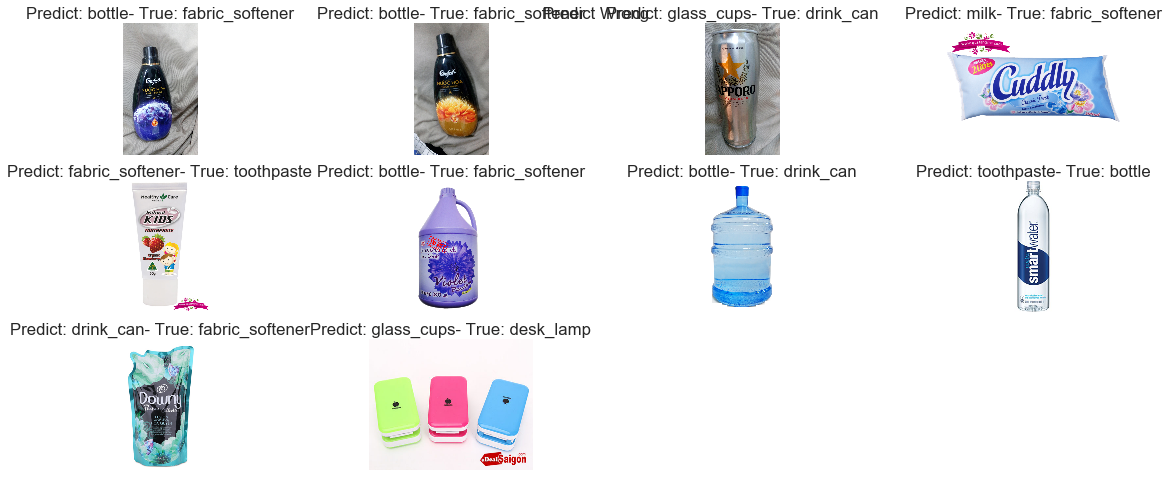

In [69]:
imageTest = imageData['testImages']
# create a fig to show image
fig = plt.figure(figsize=(20,8))

plt.title('Predict Wrong')
plt.axis('off')

predictTrue = label_SVM == test_Y
count = 0
# for all 0-9 labels
for i in range(test_Y.shape[0]):
    if count > 9:
        break
    if not predictTrue[i]:
        # initialize subplots in a grid 2x5 at i+1th position
        image = misc.imread(imageTest[i], mode='RGB')
        ax = fig.add_subplot(3, 4, 1+count) 
        # display image
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title("Predict: " + label_SVM[i] + "- True: " + test_Y[i])
        #ax.set_title("True: " + test_Y[i])
        #don't show the axes
        plt.axis('off')
        count += 1
plt.show()

Confusion Matrix



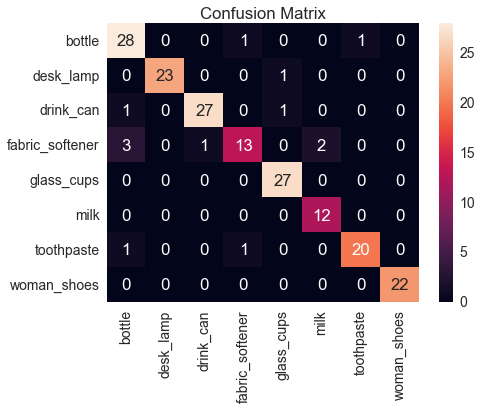

In [39]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

confu_matrix = confusion_matrix(test_Y, label_SVM, labels=classes)

df = pd.DataFrame(confu_matrix, index=classes, columns = classes)
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix')
sn.heatmap(df, annot=True)